In [ ]:
Итоговое задание по Проекту 2 - Разведывательный анализ данных

Я приглашен поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в
повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике,
чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого 
ученика школы. 

Чтобы определиться с параметрами будущей модели, необходимр провести разведывательный анализ данных и составить 
отчёт по его результатам. 

In [ ]:
План выполнения проекта

1. Провести первичную обработку данных. Предусмотреть возможное использование собственных функции для применения 
к столбцам определённого типа.
2. Обратить внимание на распределение признака для числовых переменных, устраните выбросы.
3. Оценить количество уникальных значений для номинативных переменных.
4. При необходимости преобразовать данные
5. Провести корреляционный анализ количественных переменных
6. Отобрать не коррелирующие переменные.
7. Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину 
(в нашем случае — на переменную score).
8. Сформулировать выводы относительно качества данных и тех переменных, которые будут использованы в дальнейшем 
построении модели.

In [ ]:
Далее выполняю пункты с 1 по 4:
Импортирую необходимые библиотеки и читаю рабочий датасет:

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [ ]:
Датасет содержит 30 столбцов, из которых 13 содержат числовые данные и 17 - строковые. Всего 395 строк, 27 столбцов
из 30 содержать менее 395 записей, обнаружены пропуски (nan)!

In [ ]:
Описание датасета к заданию

датасет содержит следующие переменные:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 
4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 
4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 
'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 
'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 
'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [132]:
# описание выше не содержит обнаруженный в датасете столбец: 'studytime, granular'.
# синтаксис названия столбца 'studytime, granular', изучение значений в его строках и результаты построенной
# корреляционной матрицы позволяют предположить (обнаружена 100% отрицательная корреляция со столбцом 'studytime'),
# что в дальнейшем анализе датасета этот столбец не потребуется, поэтому он будет удален.

print(stud.columns) 
print(stud['studytime, granular'].unique()) 

import pandas as pd
df = pd.read_csv('stud_math.csv')
display(df.corr())

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')
[ -6.  -9.  -3.  nan -12.]


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [18]:
stud.drop(['studytime, granular'], inplace = True, axis = 1) # удаляю столбец 'studytime, granular' из датасета

# для удобства работы с датасет переименуем оставшиеся столбцы:
stud.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'mom_edu', 'dad_edu',
       'mom_job', 'dad_job', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'fam_rel',
       'free_time', 'goout', 'health', 'absences', 'score']
display(stud.head())
stud.info()

,school,sex,age,address,fam_size,p_status,mom_edu,dad_edu,mom_job,dad_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          395 non-null    int64  
 3   address      378 non-null    object 
 4   fam_size     368 non-null    object 
 5   p_status     350 non-null    object 
 6   mom_edu      392 non-null    float64
 7   dad_edu      371 non-null    float64
 8   mom_job      376 non-null    object 
 9   dad_job      359 non-null    object 
 10  reason       378 non-null    object 
 11  guardian     364 non-null    object 
 12  travel_time  367 non-null    float64
 13  study_time   388 non-null    float64
 14  failures     373 non-null    float64
 15  school_sup   386 non-null    object 
 16  fam_sup      356 non-null    object 
 17  paid         355 non-null    object 
 18  activities   381 non-null    object 
 19  nursery 

In [ ]:
# так же была построена корреляционная 

In [13]:
# Продолжаю анализ столбцов, для упрощения анализа столбцов с номинативными данными, подсчета уникальных переменных
# и наличия пропусков буду использовать следующую функцию:

def uniq_count(column_name):
    display(stud[column_name].value_counts())
    print('уникальных значений: {}, пропусков(nan): {}'.
      format(len(stud[column_name].value_counts()), 395 - stud[column_name].count()))
    return

In [19]:
#1) столбец 'school':
    
uniq_count('school')

# столбец номинативный полностью заполнен данными, в нем аббревиатуры только двух школ: 'GP'; 'MS' 

GP    349
MS     46
Name: school, dtype: int64

уникальных значений: 2, пропусков(nan): 0


In [20]:
# 2) столбец 'sex' - номинативный полностью заполнен и содержит логичные два значения: 'F'; 'M'

uniq_count('sex')

F    208
M    187
Name: sex, dtype: int64

уникальных значений: 2, пропусков(nan): 0


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


,school,sex,age,address,fam_size,p_status,mom_edu,dad_edu,mom_job,dad_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


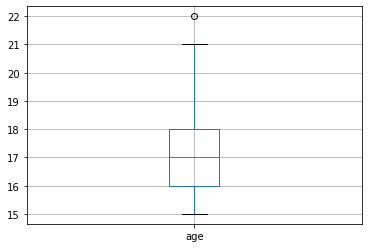

In [46]:
# 3) столбец 'age' - номинативный полностью заполнен, содержит выброс - одного ученика 22 лет, 
# так как его строка данных полностью заполнена, пока оставлю ее.
# распределение имеет положительное смещение.

stud.boxplot(column = 'age')
print(stud.age.describe())
display(stud[stud.age == 22])

<AxesSubplot:>

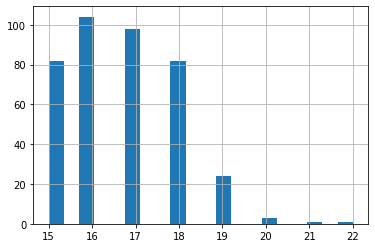

In [370]:
stud.age.hist(bins = 20)

In [21]:
# 4) столбец 'address' номинативный содержит два вида значений в соответствии с описанием и 17 пропусков

uniq_count('address')

U    295
R     83
Name: address, dtype: int64

уникальных значений: 2, пропусков(nan): 17


In [22]:
# 5) столбец 'fam_size' номинативный содержит два вида значений в соответствии с описанием и 27 пропусков

uniq_count('fam_size')

GT3    261
LE3    107
Name: fam_size, dtype: int64

уникальных значений: 2, пропусков(nan): 27


In [23]:
# 6) столбец 'p_status' номинативный содержит два вида значений в соответствии с описанием и 45 пропусков

uniq_count('p_status')

T    314
A     36
Name: p_status, dtype: int64

уникальных значений: 2, пропусков(nan): 45


In [24]:
# 7) столбец 'mom_edu' номинативный содержит пять видов значений в соответствии с описанием и 3 пропуска

uniq_count('mom_edu')

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: mom_edu, dtype: int64

уникальных значений: 5, пропусков(nan): 3


In [25]:
# 8) столбец 'dad_edu' номинативный содержит пять видов значений в соответствии с описанием, 24 пропуска 
# и одну ошибку ввода 

uniq_count('dad_edu')

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: dad_edu, dtype: int64

уникальных значений: 6, пропусков(nan): 24


In [26]:
# предполагаю, что при заполнении данных в ячейке произошла описка (лишний ноль), поэтому заменяю значение 40 на 4
    
indx_m = stud[stud.dad_edu == 40].dad_edu.index[0] # определяю индекс заменяемого значения
stud.loc[indx_m, 'dad_edu'] = 4
display(stud['dad_edu'].value_counts()) # замена прошла удачно!

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: dad_edu, dtype: int64

In [27]:
# 9) столбец 'mom_job' номинативный содержит пять видов значений в соответствии с описанием и 19 пропусков

uniq_count('mom_job')

other       133
services     98
at_home      58
teacher      55
health       32
Name: mom_job, dtype: int64

уникальных значений: 5, пропусков(nan): 19


In [28]:
# 10) столбец 'dad_job' номинативный содержит пять видов значений в соответствии с описанием и 36 пропусков.

uniq_count('dad_job')

other       197
services    102
teacher      29
at_home      16
health       15
Name: dad_job, dtype: int64

уникальных значений: 5, пропусков(nan): 36


In [29]:
# 11) столбец 'reason' номинативный содержит 4 вида значений в соответствии с описанием и 17 пропусков.

uniq_count('reason')

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

уникальных значений: 4, пропусков(nan): 17


In [30]:
# 12) столбец 'guardian' номинативный содержит 3 вида значений в соответствии с описанием и 31 пропуск.

uniq_count('guardian')

mother    250
father     86
other      28
Name: guardian, dtype: int64

уникальных значений: 3, пропусков(nan): 31


In [31]:
# 13) столбец 'travel_time' номинативный содержит 4 вида значений в соответствии с описанием и 28 пропусков.

uniq_count('travel_time')

1.0    242
2.0     96
3.0     22
4.0      7
Name: travel_time, dtype: int64

уникальных значений: 4, пропусков(nan): 28


In [32]:
# 14) столбец 'study_time' номинативный содержит 4 вида значений в соответствии с описанием и 7 пропусков.

uniq_count('study_time')

2.0    194
1.0    103
3.0     64
4.0     27
Name: study_time, dtype: int64

уникальных значений: 4, пропусков(nan): 7


In [33]:
# 15) столбец 'failures' номинативный содержит 4 вида значений в соответствии с описанием и 22 пропуска.

uniq_count('failures')

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

уникальных значений: 4, пропусков(nan): 22


In [34]:
# 16) столбец 'school_sup' номинативный содержит 2 вида значений в соответствии с описанием и 9 пропусков.

uniq_count('school_sup')

no     335
yes     51
Name: school_sup, dtype: int64

уникальных значений: 2, пропусков(nan): 9


In [35]:
# 17) столбец 'fam_sup' номинативный содержит 2 вида значений в соответствии с описанием и 39 пропусков.

uniq_count('fam_sup')

yes    219
no     137
Name: fam_sup, dtype: int64

уникальных значений: 2, пропусков(nan): 39


In [36]:
# 18) столбец 'paid' номинативный содержит 2 вида значений в соответствии с описанием и 40 пропусков.

uniq_count('paid')

no     200
yes    155
Name: paid, dtype: int64

уникальных значений: 2, пропусков(nan): 40


In [37]:
# 19) столбец 'activities' номинативный содержит 2 вида значений в соответствии с описанием и 14 пропусков.

uniq_count('activities')

yes    195
no     186
Name: activities, dtype: int64

уникальных значений: 2, пропусков(nan): 14


In [38]:
# 20) столбец 'nursery' номинативный содержит 2 вида значений в соответствии с описанием и 16 пропусков.

uniq_count('nursery')

yes    300
no      79
Name: nursery, dtype: int64

уникальных значений: 2, пропусков(nan): 16


In [39]:
# 21) столбец 'higher' номинативный содержит 2 вида значений в соответствии с описанием и 20 пропусков.

uniq_count('higher')

yes    356
no      19
Name: higher, dtype: int64

уникальных значений: 2, пропусков(nan): 20


In [40]:
# 22) столбец 'internet' номинативный содержит 2 вида значений в соответствии с описанием и 34 пропуска.

uniq_count('internet')

yes    305
no      56
Name: internet, dtype: int64

уникальных значений: 2, пропусков(nan): 34


In [41]:
# 23) столбец 'romantic' номинативный содержит 2 вида значений в соответствии с описанием и 31 пропуск.

uniq_count('romantic')

no     240
yes    124
Name: romantic, dtype: int64

уникальных значений: 2, пропусков(nan): 31


In [42]:
# 24) столбец 'fam_rel' номинативный содержит 5 видов значений в соответствии с описанием, 27 пропусков и 
# одну ошибку ввода.

uniq_count('fam_rel')

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: fam_rel, dtype: int64

уникальных значений: 6, пропусков(nan): 27


In [43]:
# предполагаю, что при заполнении данных в ячейке произошла описка (лишний '-'), поэтому заменяю значение -1 на 1
    
indx_m = stud[stud.fam_rel == -1].fam_rel.index[0] # определяю индекс заменяемого значения
stud.loc[indx_m, 'fam_rel'] = 1
display(stud['fam_rel'].value_counts()) # замена прошла удачно!

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: fam_rel, dtype: int64

In [44]:
# 25) столбец 'free_time' номинативный содержит 5 видов значений в соответствии с описанием и 11 пропусков.

uniq_count('free_time')

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: free_time, dtype: int64

уникальных значений: 5, пропусков(nan): 11


In [45]:
# 26) столбец 'goout' номинативный содержит 5 видов значений в соответствии с описанием и 8 пропусков.

uniq_count('goout')

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

уникальных значений: 5, пропусков(nan): 8


In [46]:
# 27) столбец 'health' номинативный содержит 5 видов значений в соответствии с описанием и 15 пропусков.

uniq_count('health')

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

уникальных значений: 5, пропусков(nan): 15


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

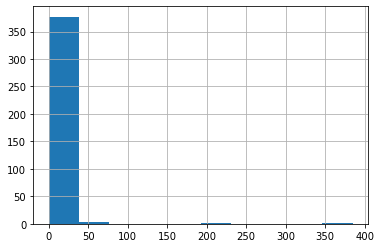

In [47]:
# 28) столбец 'absences' количественный содержит и 12 пропусков (nan), среднее значительно больше медианы, 
# что говорит о правом (положительном) распределении данных и основное их распределение лежит между 0 и 30, 
# так же обнаружены выбросы

print(stud.absences.describe())
stud.absences.hist()
stud.absences.unique()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


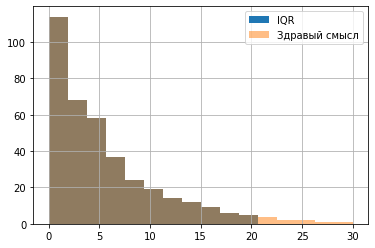

In [361]:
# для отфильтровки выбросов расчитаю IQR - межквартильный размах. 

perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (0, 30), label = 'IQR')
 
stud.absences.loc[stud.absences <= 212].hist(
alpha = 0.5, bins = 16, range = (0, 30), label = 'Здравый смысл')
 
plt.legend();

In [48]:
# Полученный график и анализ фильтрации ниже, предоставляют возможность исключить из датасета 21 из 395 строку с 
# данными, что не повлиет негативно на структуру и ценность данных для их дальнейшего использования, 
# что так же позволит сократить количество пропусков (nan) в датасете.

stud[stud.absences >= 20]

,school,sex,age,address,fam_size,p_status,mom_edu,dad_edu,mom_job,dad_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,yes,NaN,no,NaN,2.0,4.0,5.0,20.0,40.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,NaN,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
237,GP,F,16,U,NaN,T,2.0,1.0,other,other,home,mother,1.0,1.0,0.0,no,NaN,no,no,yes,yes,yes,yes,4.0,5.0,2.0,5.0,20.0,60.0


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


<AxesSubplot:>

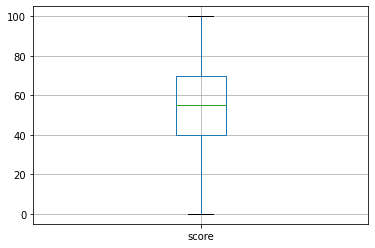

In [259]:
# 29) столбец 'score' количественный и содержит 6 пропусков (nan). Выбросы отсутствуют, оценки имеют почти 
# симметричное распределение с необольшим смещением вниз к минимуму (отрицательное), что подверждается сравнением 
# медианы и среднего, медиана больше среднего почти на 5%,
# 50% оценок сосредоточены между соответстующими квартилями Q1 = 40 и Q3 = 70

print(stud.score.describe())
stud.boxplot(column = 'score')

In [51]:
# При изучении датасета были обнаружены в 26 столбцах из 29 пропуски (nan), так как эти пропуски носят случайный 
# характер столбцы с номинативными данными буду заполнять, используя следующую функцию:

import numpy as np
np.random.seed(1) # фиксируем рендомность, чтоб значения не менялись каждый раз при запуске    
def nan_to_values(column_list, change_list):
    for column in column_list:
        stud[column] = stud[column].apply(lambda x: np.random.choice(change_list,1)[0] 
                                  if pd.isna(x) else x)
    return    


In [52]:
# заполняю значения в столбце 'address':
import numpy as np

change_list = ['U','R']
column_list = ['address']
nan_to_values(column_list,change_list)
stud.address.unique()

array(['U', 'R'], dtype=object)

In [53]:
# заполняю значения в столбце 'fam_size':
import numpy as np

change_list = ['GT3','LE3']
column_list = ['fam_size']
nan_to_values(column_list,change_list)
stud.fam_size.unique()

array(['LE3', 'GT3'], dtype=object)

In [54]:
# заполняю значения в столбце 'p_status':
import numpy as np

change_list = ['A','T']
column_list = ['p_status']
nan_to_values(column_list,change_list)
stud.p_status.unique()

array(['A', 'T'], dtype=object)

In [55]:
# так как варианты данных сходные одновременно могу выполнить заполнения значения  столбцах:
# 'mom_edu', 'dad_edu'
import numpy as np

change_list = [float(x) for x in range(5)]
column_list = ['mom_edu', 'dad_edu']
nan_to_values(column_list,change_list)

In [56]:
# так как варианты данных сходные одновременно могу выполнить заполнения значения  столбцах:
# 'travel_time', 'study_time'
import numpy as np

change_list = [float(x) for x in range(1, 5)]
column_list = ['travel_time', 'study_time']
nan_to_values(column_list,change_list)

In [57]:
# заполняю значения в столбце 'reason':
import numpy as np

change_list = ['course', 'other', 'home', 'reputation']
column_list = ['reason']
nan_to_values(column_list,change_list)
stud.reason.unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [58]:
# заполняю значения в столбце 'guardian':
import numpy as np

change_list = ['mother', 'father', 'other']
column_list = ['guardian']
nan_to_values(column_list,change_list)
stud.guardian.unique()

array(['mother', 'father', 'other'], dtype=object)

In [59]:
# заполняю значения в столбце 'failures':
import numpy as np

change_list = [float(x) for x in range(4)]
column_list = ['failures']
nan_to_values(column_list,change_list)
stud.failures.unique()

array([0., 3., 2., 1.])

In [60]:
# так как варианты данных сходные одновременно могу выполнить заполнения значения  столбцах:
# 'school_sup', 'fam_sup', 'paid', 'activities','nursery', 'higher', 'internet', 'romantic'
import numpy as np

change_list = ['no', 'yes']
column_list = ['school_sup', 'fam_sup', 'paid', 'activities',
               'nursery', 'higher', 'internet', 'romantic']
nan_to_values(column_list,change_list)

In [61]:
# так как варианты данных сходные одновременно могу выполнить заполнения значения  столбцах:
# 'fam_rel', 'free_time','goout', 'health'
import numpy as np

change_list = [float(x) for x in range(1, 6)]
column_list = ['fam_rel', 'free_time','goout', 'health']
nan_to_values(column_list,change_list)

In [62]:
# так как варианты данных сходные одновременно могу выполнить заполнения значения  столбцах:
# 'mom_job', 'dad_job'
import numpy as np

change_list = ['teacher', 'other', 'health', 'services', 'at_home']
column_list = ['mom_job', 'dad_job']
nan_to_values(column_list,change_list)

In [63]:
# все пропуски данных в номинотивных столбцах заполнены:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          395 non-null    int64  
 3   address      395 non-null    object 
 4   fam_size     395 non-null    object 
 5   p_status     395 non-null    object 
 6   mom_edu      395 non-null    float64
 7   dad_edu      395 non-null    float64
 8   mom_job      395 non-null    object 
 9   dad_job      395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  travel_time  395 non-null    float64
 13  study_time   395 non-null    float64
 14  failures     395 non-null    float64
 15  school_sup   395 non-null    object 
 16  fam_sup      395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

In [64]:
# как указывал ранее для устранения выбросов удаляю 21 строку в столбце 'absences':

list_to_drop = (stud[stud.absences >= 20].index) # определяем индексы удаляемых строк
stud.drop(list_to_drop, inplace = True)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       374 non-null    object 
 1   sex          374 non-null    object 
 2   age          374 non-null    int64  
 3   address      374 non-null    object 
 4   fam_size     374 non-null    object 
 5   p_status     374 non-null    object 
 6   mom_edu      374 non-null    float64
 7   dad_edu      374 non-null    float64
 8   mom_job      374 non-null    object 
 9   dad_job      374 non-null    object 
 10  reason       374 non-null    object 
 11  guardian     374 non-null    object 
 12  travel_time  374 non-null    float64
 13  study_time   374 non-null    float64
 14  failures     374 non-null    float64
 15  school_sup   374 non-null    object 
 16  fam_sup      374 non-null    object 
 17  paid         374 non-null    object 
 18  activities   374 non-null    object 
 19  nursery 

In [65]:
# пропуски (nan) в колонках 'absences' и 'score' меняю на соответствующие моды:
import pandas as pd

stud['absences'] = stud['absences'].apply(lambda x: stud.absences.mode()
                                  if pd.isna(x) else x)

stud['score'] = stud['score'].apply(lambda x: stud.score.mode()
                                  if pd.isna(x) else x)

In [66]:
# пропуски (nan) в нашем датасете теперь отсутствуют, необходимо привести в порядок типы данных для количественных и
# номинативных данных, для чего приведу датасет к следующей структуре данных, которая и была задана изначально:

# 1) номинативные нечисловые столбцы, всего 17 из 29:
# 'school', 'sex', 'address', 'fam_size', 'p_status', 
# 'mom_job', 'dad_job', 'reason', 'guardian', 'school_sup',
# 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 
# 'internet', 'romantic'

# 2) номинативные числовые столбцы, всего 10 из 29:
# 'age', mom_edu', 'dad_edu', 'travel_time', 'study_time', 
# 'failures', 'fam_rel', 'free_time', 'goout', 'health'

# 3) количественные числовые столбцы, всего 2 из 29:
# 'absences', 'score'

# применяю следующие коды для строк столбцов 'absences', 'score': 

stud['absences'] = stud['absences'].apply(lambda x: float(x))
stud['score'] = stud['score'].apply(lambda x: float(x))

stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       374 non-null    object 
 1   sex          374 non-null    object 
 2   age          374 non-null    int64  
 3   address      374 non-null    object 
 4   fam_size     374 non-null    object 
 5   p_status     374 non-null    object 
 6   mom_edu      374 non-null    float64
 7   dad_edu      374 non-null    float64
 8   mom_job      374 non-null    object 
 9   dad_job      374 non-null    object 
 10  reason       374 non-null    object 
 11  guardian     374 non-null    object 
 12  travel_time  374 non-null    float64
 13  study_time   374 non-null    float64
 14  failures     374 non-null    float64
 15  school_sup   374 non-null    object 
 16  fam_sup      374 non-null    object 
 17  paid         374 non-null    object 
 18  activities   374 non-null    object 
 19  nursery 

In [ ]:
Далее выполняю пункт 5 и 6 проекта:

Корреляционный анализ
Выясним, данные каких числовых столбцов коррелируют со столбцом 'score', Для быстрого построения графиков 
зависимости переменных использую функцию pairplot из модуля seaborn:

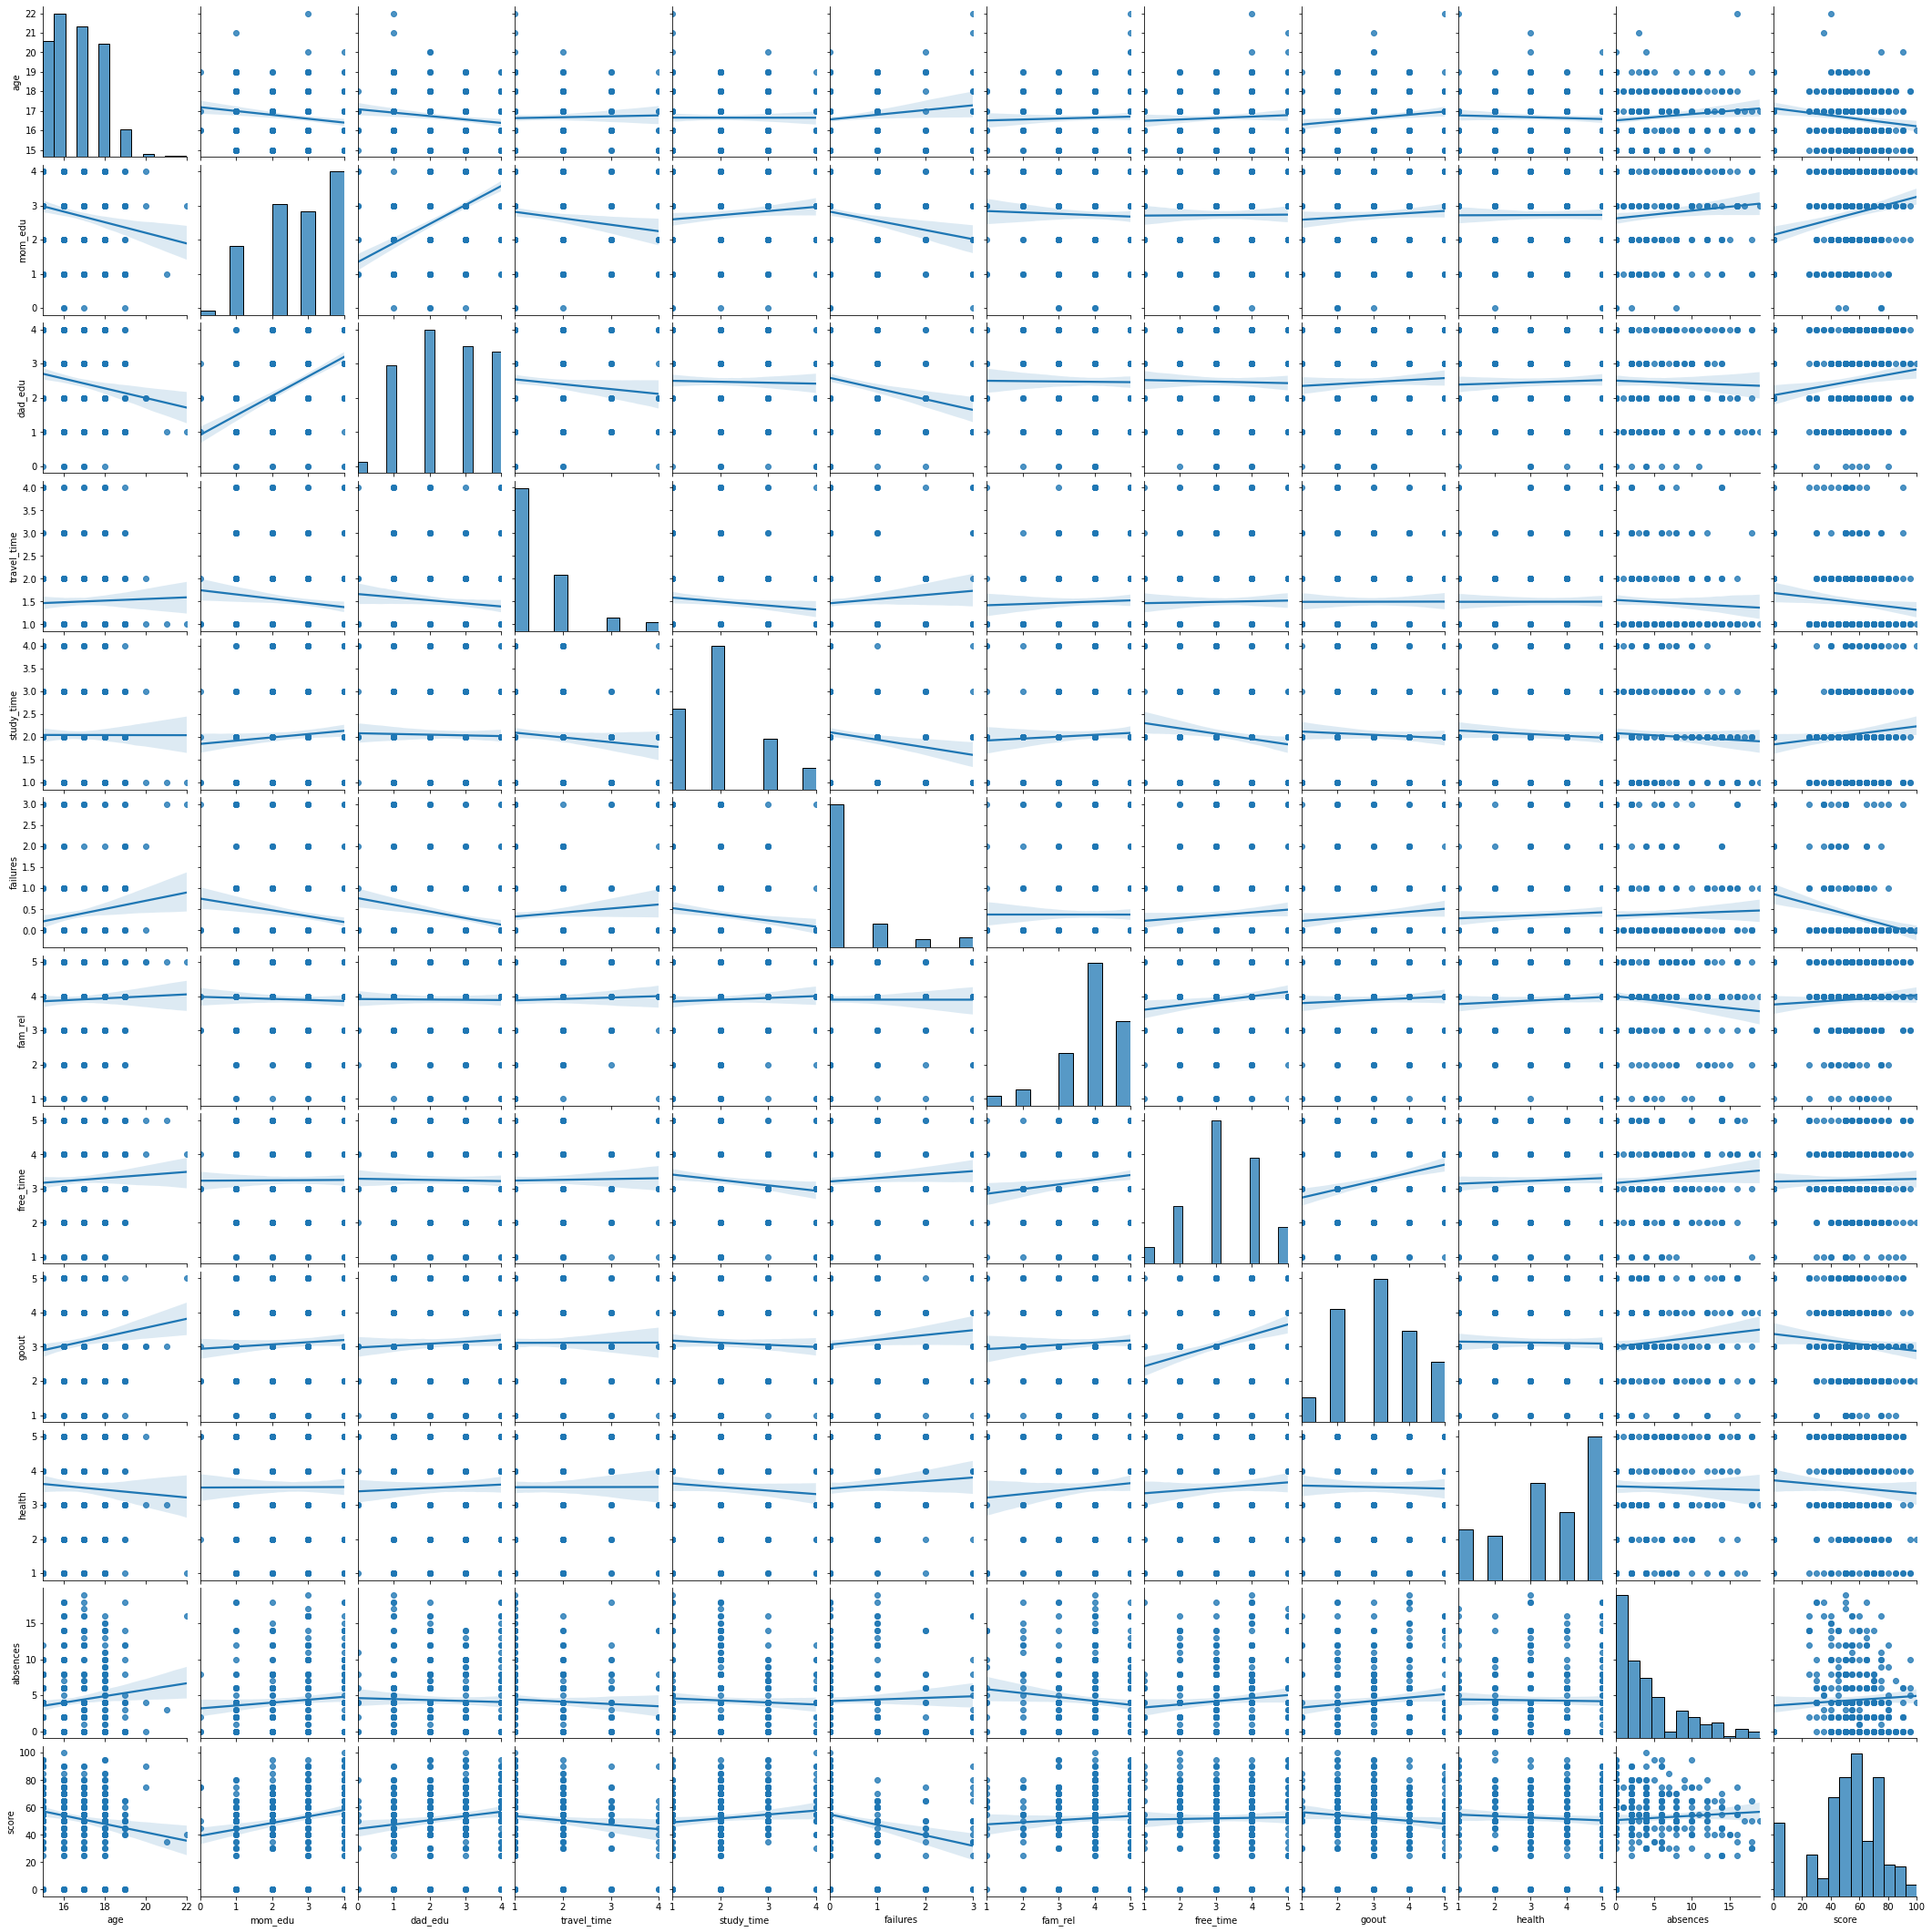

In [67]:
import seaborn as sns
sns.pairplot(stud, kind = 'reg')

In [68]:
# Используем для наглядности матрицу корреляций:
stud.corr()

,age,mom_edu,dad_edu,travel_time,study_time,failures,fam_rel,free_time,goout,health,absences,score
age,1.000000,-0.175122,-0.157604,0.028880,-0.001089,0.153846,0.037555,0.057811,0.148612,-0.051259,0.120090,-0.168597
mom_edu,-0.175122,1.000000,0.563314,-0.132185,0.093618,-0.193579,-0.035272,0.006235,0.064346,0.003349,0.095309,0.229089
dad_edu,-0.157604,0.563314,1.000000,-0.098299,-0.020849,-0.222740,-0.008764,-0.019810,0.056877,0.040349,-0.032870,0.154047
travel_time,0.028880,-0.132185,-0.098299,1.000000,-0.095657,0.093247,0.033107,0.018067,0.001884,0.001273,-0.053142,-0.108996
study_time,-0.001089,0.093618,-0.020849,-0.095657,1.000000,-0.156356,0.047060,-0.135499,-0.047284,-0.063645,-0.051659,0.107089
failures,0.153846,-0.193579,-0.222740,0.093247,-0.156356,1.000000,-0.000175,0.081916,0.101280,0.062087,0.038278,-0.268652
fam_rel,0.037555,-0.035272,-0.008764,0.033107,0.047060,-0.000175,1.000000,0.133889,0.055114,0.073775,-0.111597,0.064807
free_time,0.057811,0.006235,-0.019810,0.018067,-0.135499,0.081916,0.133889,1.000000,0.272281,0.056795,0.090759,0.018010
goout,0.148612,0.064346,0.056877,0.001884,-0.047284,0.101280,0.055114,0.272281,1.000000,-0.017786,0.110503,-0.102706
health,-0.051259,0.003349,0.040349,0.001273,-0.063645,0.062087,0.073775,0.056795,-0.017786,1.000000,-0.019438,-0.063665


In [ ]:
Выводы: Так как корреляция между переменными, значение которой по модулю близкое к 1, не обнаружена, следовательно
логично сохранить все 12 переменных в датасете как значимые для будущей модели.

In [ ]:
Далее выполняю пункт 7 проекта:
    
Проведу анализ номинативных нечисловых переменных с данными столбца 'score' следующих столбцов:
'school', 'sex', 'address', 'fam_size', 'p_status', 
'mom_job', 'dad_job', 'reason', 'guardian', 'school_sup',
'fam_sup', 'paid', 'activities', 'nursery', 'higher', 
'internet', 'romantic'   
Очевидно, что для номинативных нечисловых переменных использовать корреляционный анализ не получится. 
Поэтому рассмотрим, различаются ли распределения оценок на экзамене по матиматике в зависимости от значений
этих переменных. Для чего используем box-plot и следующую подготовленную функцию get_boxplot(column):

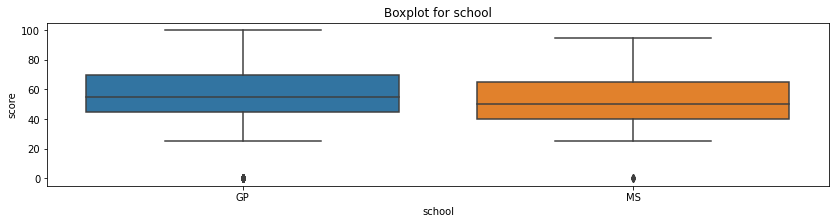

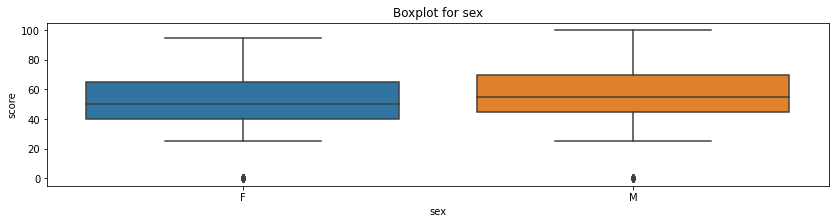

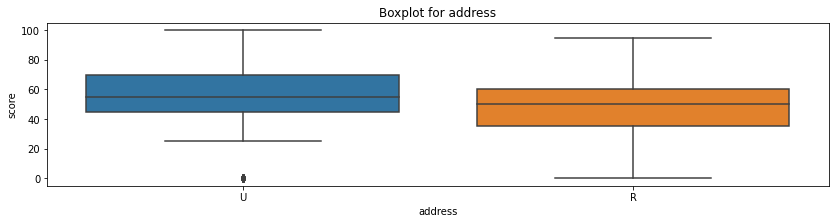

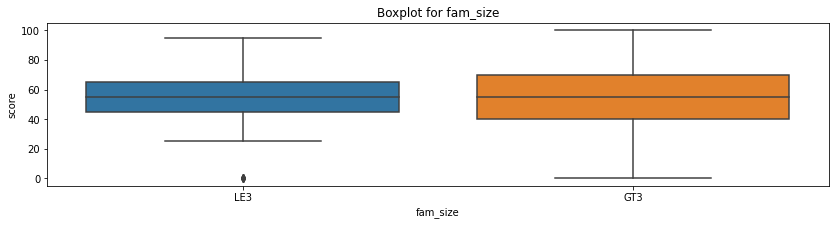

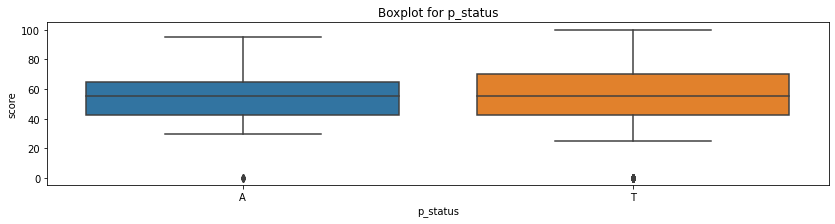

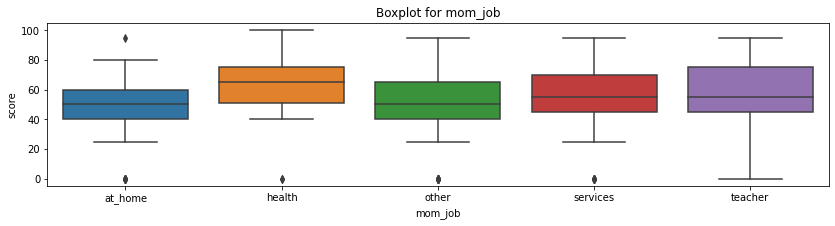

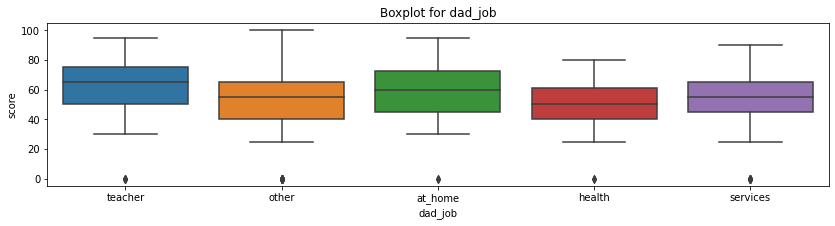

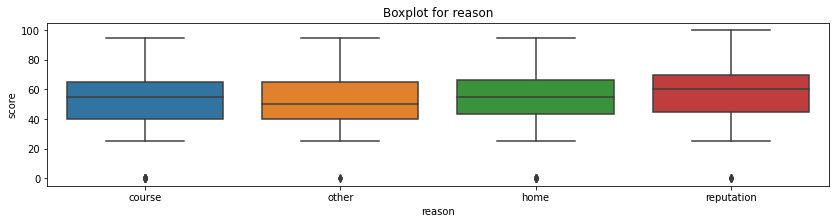

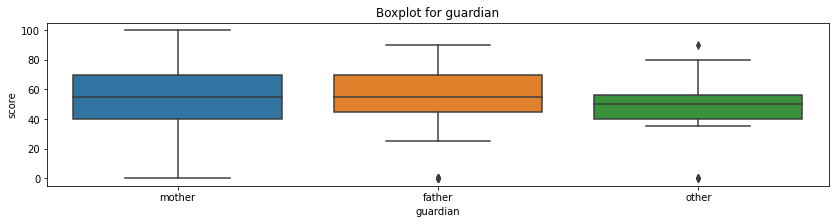

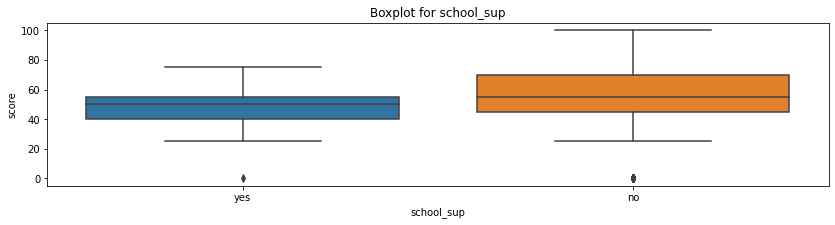

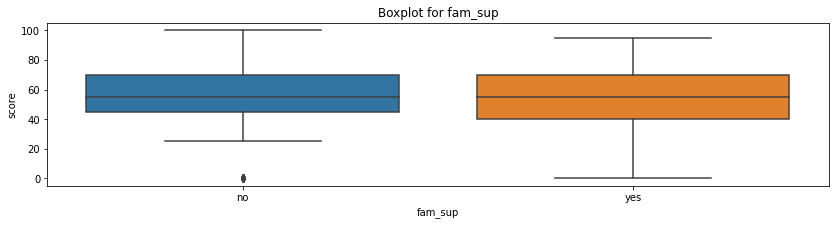

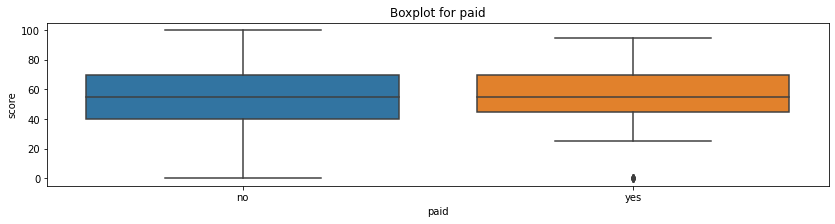

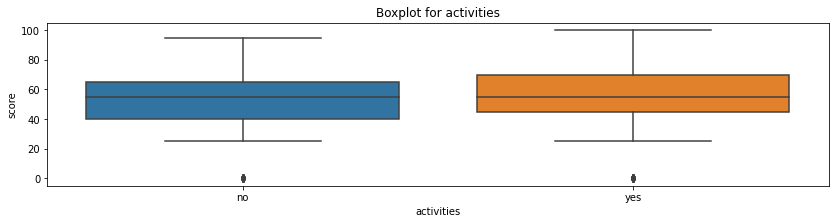

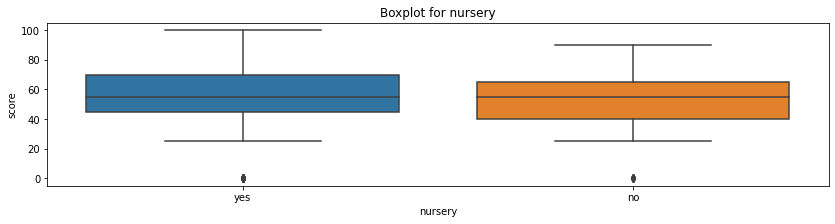

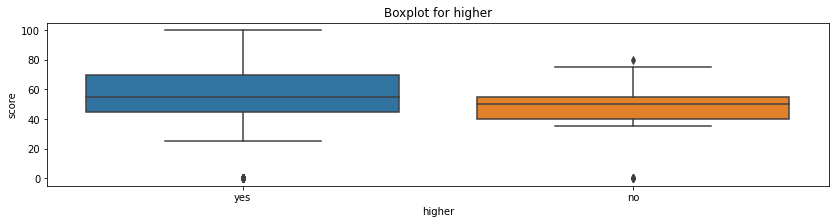

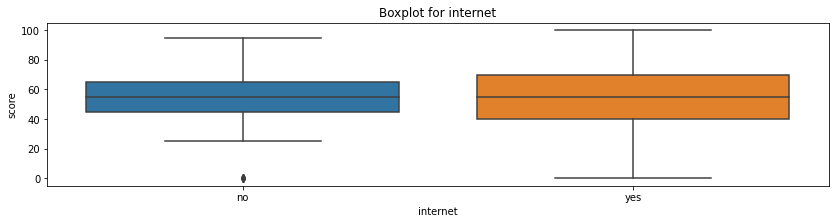

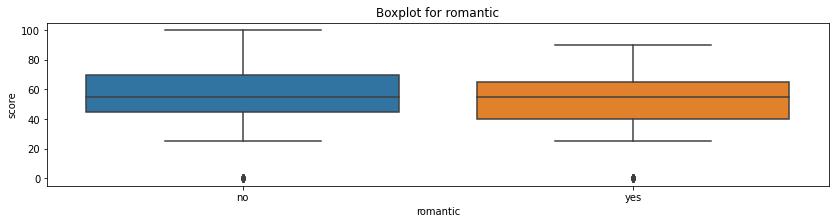

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 3))
    ax.set_title('Boxplot for ' + column)
    sns.boxplot(x = column, y = 'score', data = stud)
    plt.show()
    
for col in ['school', 'sex', 'address', 'fam_size', 'p_status', 
            'mom_job', 'dad_job', 'reason', 'guardian', 'school_sup',
            'fam_sup', 'paid', 'activities', 'nursery', 'higher', 
            'internet', 'romantic']:
    get_boxplot(col)

In [ ]:
Представленные выше графики показывают, что практически все параметры, могут влиять на полученный учащимися балл по 
госэкзамену по матиматике. 
Так как графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь 
распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, 
с помощью теста Стьюдента. 
Проверю нулевую гипотезу о том, что распределения баллов на экзамене по различным параметрам неразличимы,
использую следующую подготовленную функцию get_stat_dif(column):

In [122]:
from itertools import combinations

def get_stat_dif(column):
    cols = stud[column].unique()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for col in ['school', 'sex', 'address', 'fam_size', 'p_status', 
            'mom_job', 'dad_job', 'reason', 'guardian', 'school_sup',
            'fam_sup', 'paid', 'activities', 'nursery', 'higher', 
            'internet', 'romantic']:
    get_stat_dif(col)            

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки mom_job
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [6]:
Результат проверки выше показал, что из 17 номинативных нечисловых столбцов серьёзно отличаются только 
следующие четыре:
'sex', 'mom_job', 'higher', 'romantic'
Оставим эти переменные в датасете для дальнейшего построения модели. 

In [ ]:
Таким образом в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку учащегося
по матиматике содержатся в следующих 16 столбцах: 

1) номинативные нечисловые (4 столбца):
'sex', 'mom_job', 'higher', 'romantic'

2) номинативные числовые (10 столбцов):
'age', 'mom_edu', 'dad_edu','travel_time', 'study_time', 
'failures', 'fam_rel', 'free_time', 'goout', 'health'

3) количественные числовые (2 столбца):
 'absences', 'score'

In [123]:
stud_for_model = stud.loc[:, ['sex', 'age', 'mom_edu', 'dad_edu', 'mom_job', 'travel_time', 'study_time', 'failures',
                              'higher', 'romantic', 'fam_rel','free_time', 'goout', 'health', 'absences', 'score']]

stud_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 394
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          374 non-null    object 
 1   age          374 non-null    int64  
 2   mom_edu      374 non-null    float64
 3   dad_edu      374 non-null    float64
 4   mom_job      374 non-null    object 
 5   travel_time  374 non-null    float64
 6   study_time   374 non-null    float64
 7   failures     374 non-null    float64
 8   higher       374 non-null    object 
 9   romantic     374 non-null    object 
 10  fam_rel      374 non-null    float64
 11  free_time    374 non-null    float64
 12  goout        374 non-null    float64
 13  health       374 non-null    float64
 14  absences     374 non-null    float64
 15  score        374 non-null    float64
dtypes: float64(11), int64(1), object(4)
memory usage: 59.7+ KB


In [ ]:
8. Выводы

В результате EDA датасета и анализа влияния номинативных нечисловых и числовых переменных параметров на итоги 
учащихся по госэкзамену по матиматике, были получены следующие выводы:

- Данные в исходном датасете содержали допустимое - около 15%, пустых значений и несколько ошибок ввода, что 
позволило без особых усилий и ухудшения качества данных в датасете заполнить пропуски, исправить ошибки ввода, 
а также привести данные к их логичному формату.
- Выбросы были найдены только в столбце 'absences' - количество пропущенных занятий, принято решение, удалить 
21 строку данных этого столбца. 
- Корреляционный анализ данных числовых столбцов и статистический анализ нечисловых переменных с использованием 
теста Стьюдента позволил отфильтровать вероятностно значимые столбцы и строки датасета для дальнейшего построения 
модели. 
- Получен более компактный рабочий датасет: stud_for_model, 
который состоит из 16 столбцов вместо изначальных 30 и 374 строк вместо изначальных 395, производный датасет очищен
от всех перечисленных ранее недостатков исходника и может быть использован для дальнейшего моделирования,
и достижения целей проекта UNICEF в соответствии с исполненными задачами этого проекта.